Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))
split = initial_split(diabetes, strata = Outcome)
diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 3, 1, 13, 5, 5, 6, 10,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 126, 97, 145…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 88, 66, 82, 92, 75…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 41, 15, 19, 0, 26, 0,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 235, 140, 110, 0, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 27, 22, 57, 38, 6…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In [ ]:
the "outcome" in a logistic regression model
should be a binary categorical with two possible outcomes. 
therefore in this dataset the Outcome variable should be 'outcome'

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |             |
| BMI         |             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

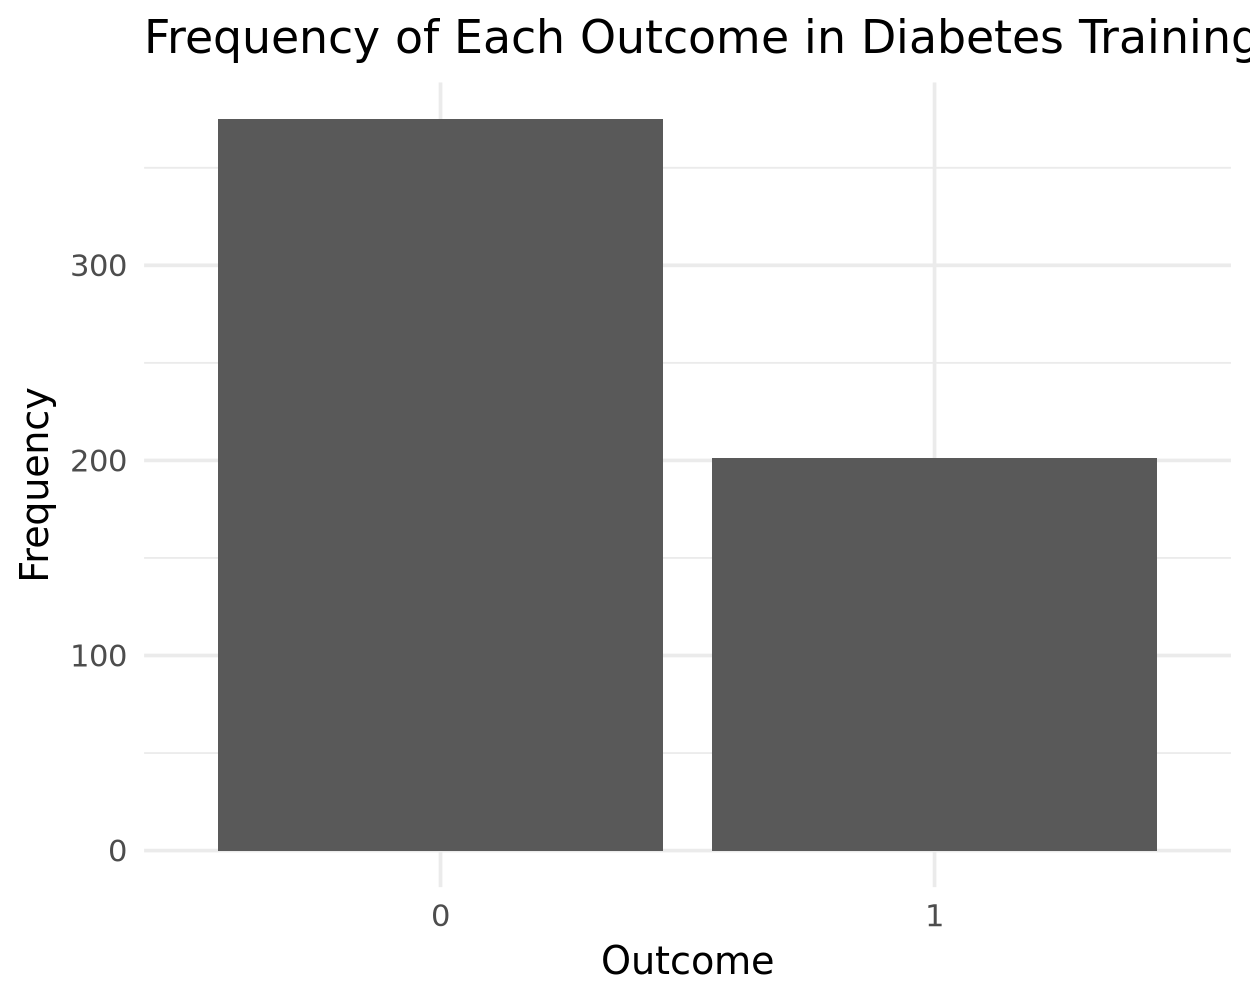

In [4]:
# Create a bar chart of outcome frequencies
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar() +
  labs(title = "Frequency of Each Outcome in Diabetes Training Data",
       x = "Outcome",
       y = "Frequency") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

In [ ]:
no for as you can see there is far more 0's then 1's

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

# A tibble: 6 × 3
  Outcome name    value
  <fct>   <chr>   <dbl>
1 0       Glucose  85  
2 0       BMI      26.6
3 0       Glucose  89  
4 0       BMI      28.1
5 0       Glucose 116  
6 0       BMI      25.6


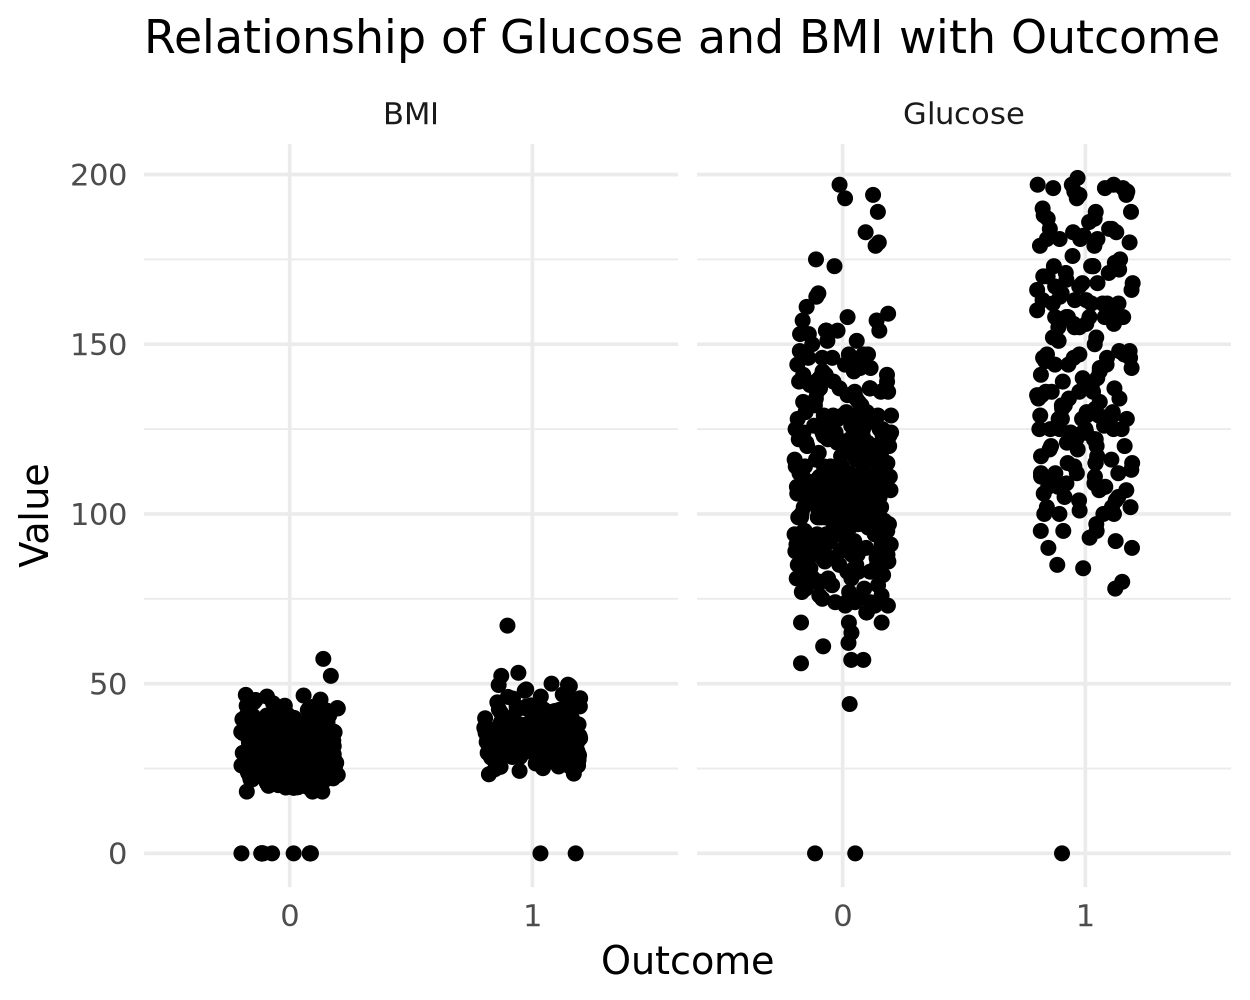

In [6]:
# Split the data into training and testing sets
set.seed(123)  # For reproducibility
split = initial_split(diabetes, strata = Outcome)
# Create a table for plotting the predictors
plot_df = diabetes_train |>
  select(Outcome, Glucose, BMI) |>
  pivot_longer(cols = c(Glucose, BMI))

# Print the first few rows of the table
print(head(plot_df))

# Create the plot
ggplot(plot_df, aes(x = Outcome, y = value)) +
  geom_jitter(width = 0.2, height = 0) +
  facet_wrap(~ name, ncol = 2, scales = 'free_x') +
  labs(title = "Relationship of Glucose and BMI with Outcome",
       x = "Outcome",
       y = "Value") +
  theme_minimal()

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

# A tibble: 6 × 3
  Outcome name    value
  <fct>   <chr>   <dbl>
1 0       Glucose  89  
2 0       BMI      28.1
3 0       Glucose 116  
4 0       BMI      25.6
5 0       Glucose 115  
6 0       BMI      35.3


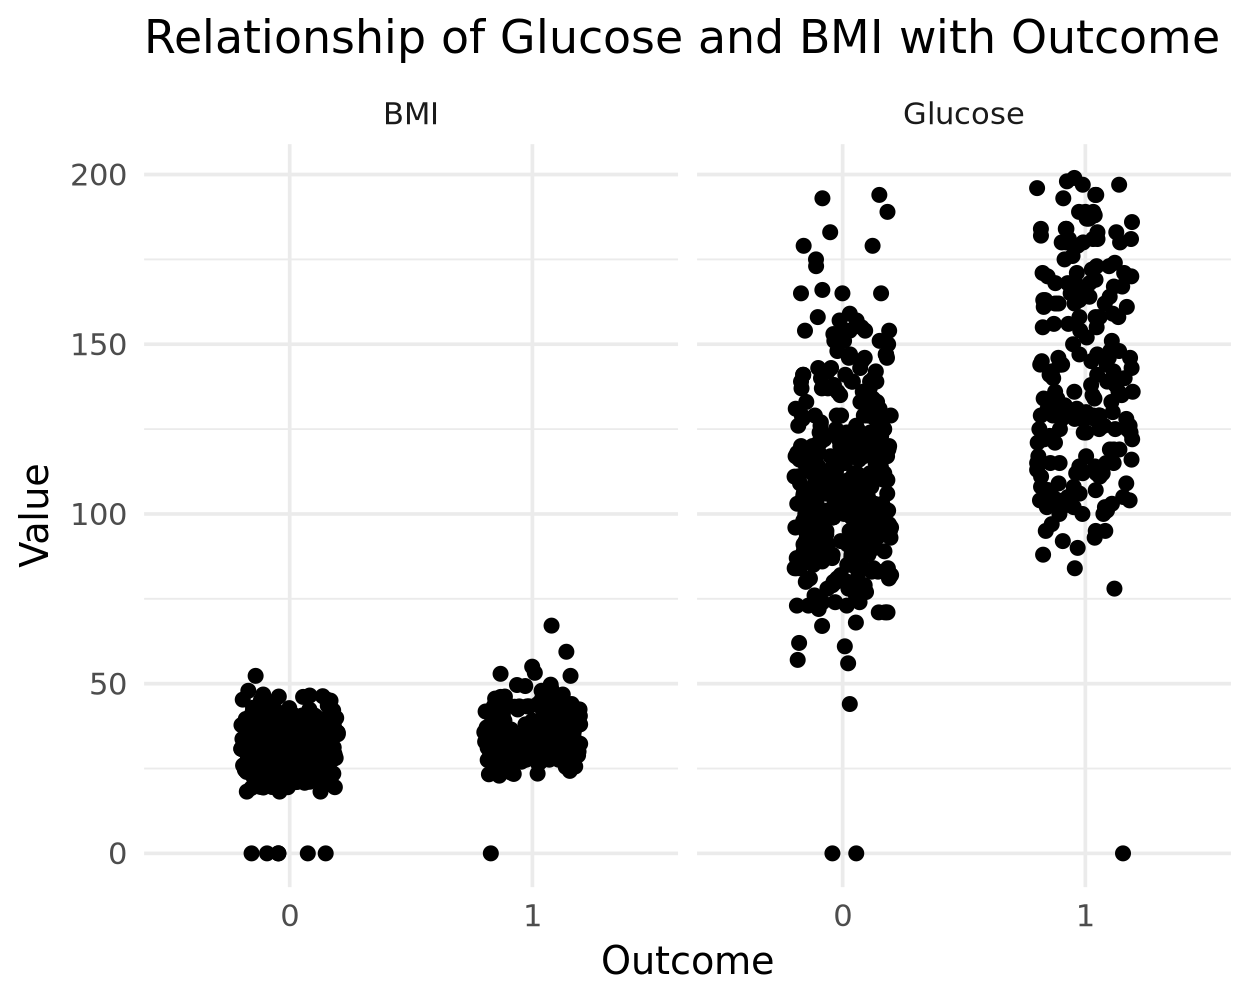

In [7]:
# Split the data into training and testing sets
set.seed(123)  # For reproducibility
split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

# Create a table for plotting the predictors
plot_df = diabetes_train |>
  select(Outcome, Glucose, BMI) |>
  pivot_longer(cols = c(Glucose, BMI))

# Print the first few rows of the table
print(head(plot_df))

# Create the plot
ggplot(plot_df, aes(x = Outcome, y = value)) +
  geom_jitter(width = 0.2, height = 0) +
  facet_wrap(~ name, ncol = 2) +  # Removed scales = 'free_x'
  labs(title = "Relationship of Glucose and BMI with Outcome",
       x = "Outcome",
       y = "Value") +
  theme_minimal()

In [ ]:
With scales = 'free_x': Each facet will have its own x-axis scale. This is useful when the x-axis variable differs across facets.
Without scales = 'free_x': The x-axis scales will be synchronized across all facets. 
However, as you can see in this peticular outcome removing the scales = 'free_x' argument had minimal visual impact
because the x-axis will always be the same for both Glucose and BMI

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:
# Split the data into training and testing sets
set.seed(123)  # For reproducibility
split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

# Create the logistic regression model specification
log_reg_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Fit the model using the training data
log_reg_fit <- log_reg_spec %>%
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)

# Print the model summary
log_reg_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.78198      0.08021      0.03622  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 576.3 	AIC: 582.3

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:
# Split the data into training and testing sets
set.seed(123)  # For reproducibility
split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

# Create the logistic regression model specification
log_reg_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Fit the model using the training data
log_reg_fit <- log_reg_spec %>%
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)

# Use augment to add predictions to the test data
diabetes_test_wPred <- augment(log_reg_fit, new_data = diabetes_test)

# Print the augmented dataset with predictions
print(diabetes_test_wPred)

# A tibble: 192 × 12
   .pred_class .pred_0 .pred_1 Pregnancies Glucose BloodPressure SkinThickness
   <fct>         <dbl>   <dbl>       <dbl>   <dbl>         <dbl>         <dbl>
 1 0            0.929   0.0711           1      85            66            29
 2 1            0.346   0.654            0     137            40            35
 3 1            0.142   0.858            2     197            70            45
 4 0            0.640   0.360           10     139            80             0
 5 1            0.426   0.574            5     166            72            19
 6 1            0.459   0.541            0     118            84            47
 7 0            0.517   0.483            3     126            88            41
 8 0            0.795   0.205            8      99            84             0
 9 1            0.0752  0.925            7     196            90             0
10 1            0.418   0.582           11     143            94            33
# ℹ 182 more rows
# ℹ 5 more va

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
# Generate predictions on the test data
diabetes_test_wPred <- augment(log_reg_fit, new_data = diabetes_test)

# Generate a confusion matrix
confusion_matrix <- diabetes_test_wPred |> conf_mat(Outcome, .pred_class)
print(confusion_matrix)


          Truth
Prediction   0   1
         0 112  31
         1  13  36


❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

In [ ]:
How many individuals had diabetes in your test data? 31+36 = 67

In [ ]:
Of those that actually had diabetes, how many were predicted to have diabetes by your model? 36

In [ ]:
How many individuals predicted to have diabetes did not have diabetes? 13